# Matrix Manipulations and Pixel Scaling

In [ ]:
# Get the data from VisionCog website

! unzip imgOCV.zip

In [ ]:
# All required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

## Creating a 3-channel matrix

In [ ]:
# shape = (Height, Width, Channel)
# fill_value = (CH1, CH2, CH3)
# dtype = 8-bit pixels
# order = C-style row major storage

img = np.full(shape=(240, 320, 3), fill_value=(0,0,0), dtype=np.uint8, order='C')

Black 3-channel image 



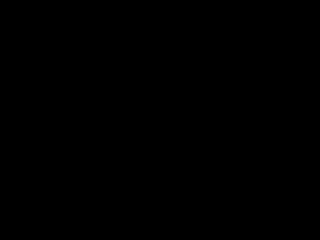

In [ ]:
print('Black 3-channel image \n')
cv2_imshow(img)

## Adding color bars

Adding color bars 



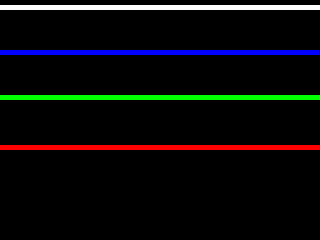

In [ ]:
# Modify this array by adding white, blue, green and red horizontal bar

img[5:10, :] = (255, 255, 255) # White
img[50:55, :] = (255, 0, 0) # Blue
img[95:100, :] = (0, 255, 0) # Green
img[145:150, :] = (0, 0, 255) # Red

print('Adding color bars \n')
cv2_imshow(img)

Adding vertical white line 



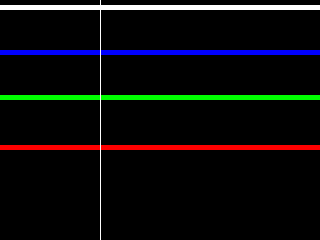

In [ ]:
img[:, 100, :] = 255 # White line

print('Adding vertical white line \n')
cv2_imshow(img)

## Individual channel manipulaiton

Modify sub-region 



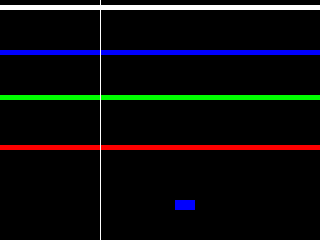

In [ ]:
# Modifying pixels on individual channels

# CH1

img[200:210, 175:195, 0] = 255

print('Modify sub-region \n')
cv2_imshow(img)

Modify sub-region 



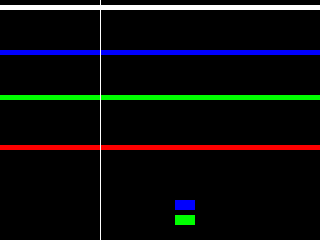

In [ ]:
# CH2

img[215:225, 175:195, 1] = 255

print('Modify sub-region \n')
cv2_imshow(img)

Modify sub-region 



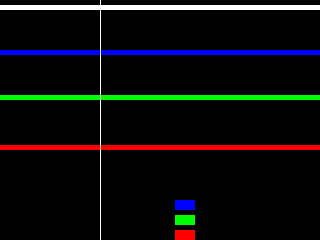

In [ ]:
# CH3

img[230:240, 175:195, 2] = 255

print('Modify sub-region \n')
cv2_imshow(img)

## Pixel scaling

In [ ]:
# Read an image, change the datatype and scale the pixels

img = cv2.imread('imgOCV/forest.jpg')

print(type(img))

<class 'numpy.ndarray'>


(256, 256, 3)


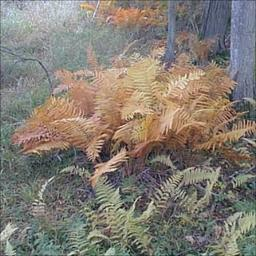

In [ ]:
print(img.shape)
cv2_imshow(img)

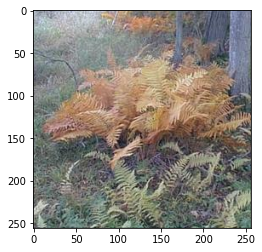

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

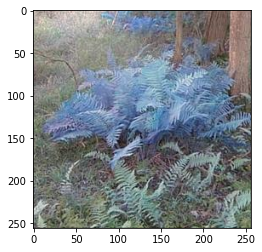

In [ ]:
plt.imshow(img)

In [ ]:
# Print the shape and data-type

print('Shape: ', img.shape)
print('dtype: ', img.dtype)


Shape:  (256, 256, 3)
dtype:  uint8


In [ ]:
# Print the min and max pixel values in the image

print('minVal: ', img.min())

print('maxVal: ', img.max())

minVal:  0
maxVal:  255


In [ ]:
img_Scaled = img/255
print(img_Scaled.dtype)

float64


In [ ]:
img_Scaled = img_Scaled.astype(np.float32)
print(img_Scaled.dtype)

float32


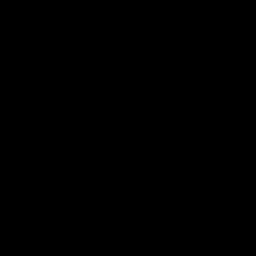

In [ ]:
cv2_imshow(img_Scaled)

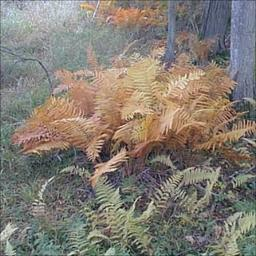

In [ ]:
cv2_imshow((img_Scaled * 255).astype(np.uint8))

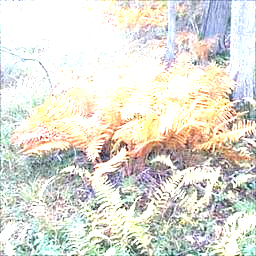

In [ ]:
img_Scaled = np.clip(img_Scaled * 2, 0, 1)

cv2_imshow((img_Scaled * 255).astype(np.uint8))

In [ ]:
blueChannel, greenChannel, redChannel = cv2.split(img)

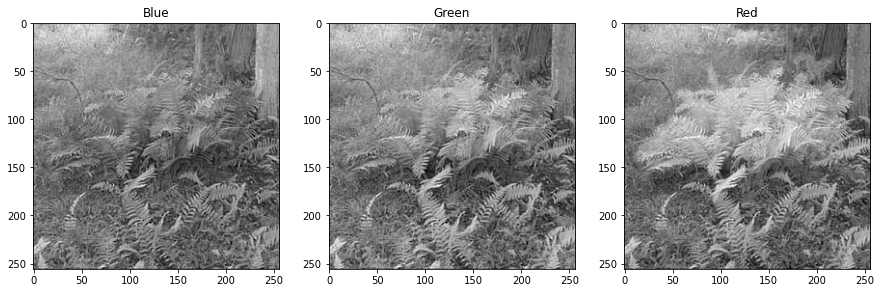

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

ax1.set_title('Blue')
ax1.imshow(blueChannel, cmap='gray')

ax2.set_title('Green')
ax2.imshow(greenChannel, cmap='gray')

ax3.set_title('Red')
ax3.imshow(redChannel, cmap='gray')

## Gamma correction to increase brightness (a non-linear scaling operation)

- $ V_{out} = A V_{in}^{\gamma}$

- usually $A = 1$

## By varying gamma, we get compression and expansion.

- __Encoding-gamma__: $\gamma < 1$ increases the brightness (compression)

- __Decoding-gamma__: $\gamma > 1$ decreases the brightness (expansion)

_Non-linear scaling here implies we are not just adding a value uniformly to all pixels._

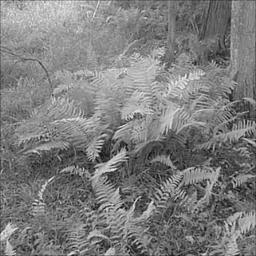

In [ ]:
# Convert it to gray scale

img_n01_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Scale the pixel value to range 0 to 1
img_n01_gray = img_n01_gray.astype(np.float32)/255

cv2_imshow(img_n01_gray * 255)

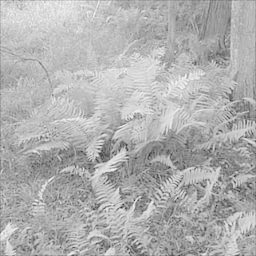

In [ ]:
gamma =  0.5

img_n01_gamma_05 = np.power(img_n01_gray, gamma)

cv2_imshow(img_n01_gamma_05 * 255)

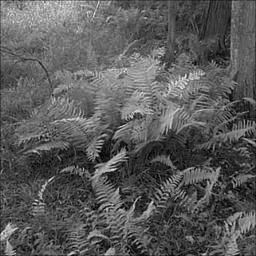

In [ ]:
gamma =  1.5

img_n01_gamma_15 = np.power(img_n01_gray, gamma)

cv2_imshow(img_n01_gamma_15 * 255)